<a href="https://colab.research.google.com/github/indranildchandra/ML101-Codelabs/blob/master/src/Handwritten_Digit_Classifiers_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comaprison of 3 classifiers for Handwritten Digit Classification
### Simple Neural Network
### Simple CNN
### Larger CNN


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


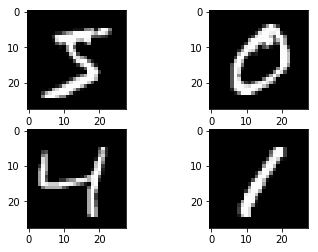

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Simple Neural Network

In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [10]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

W0615 01:56:49.675644 139722755123072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 01:56:49.696391 139722755123072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 01:56:49.701227 139722755123072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0615 01:56:49.724725 139722755123072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 01:56:49.747142 139722755123072 deprecation_wrapper.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1412 - val_acc: 0.9575
Epoch 2/10
 - 1s - loss: 0.1116 - acc: 0.9675 - val_loss: 0.0921 - val_acc: 0.9705
Epoch 3/10
 - 1s - loss: 0.0718 - acc: 0.9801 - val_loss: 0.0777 - val_acc: 0.9773
Epoch 4/10
 - 1s - loss: 0.0505 - acc: 0.9856 - val_loss: 0.0742 - val_acc: 0.9777
Epoch 5/10
 - 1s - loss: 0.0374 - acc: 0.9893 - val_loss: 0.0679 - val_acc: 0.9792
Epoch 6/10
 - 1s - loss: 0.0271 - acc: 0.9927 - val_loss: 0.0628 - val_acc: 0.9808
Epoch 7/10
 - 1s - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0608 - val_acc: 0.9815
Epoch 8/10
 - 1s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0639 - val_acc: 0.9790
Epoch 9/10
 - 1s - loss: 0.0110 - acc: 0.9977 - val_loss: 0.0594 - val_acc: 0.9811
Epoch 10/10
 - 1s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.0595 - val_acc: 0.9813
Baseline Error: 1.87%


# Simple CNN

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [20]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

W0615 02:01:02.599042 139722755123072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0615 02:01:02.608153 139722755123072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2226 - acc: 0.9365 - val_loss: 0.0789 - val_acc: 0.9754
Epoch 2/10
 - 2s - loss: 0.0713 - acc: 0.9783 - val_loss: 0.0457 - val_acc: 0.9848
Epoch 3/10
 - 2s - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0459 - val_acc: 0.9851
Epoch 4/10
 - 2s - loss: 0.0392 - acc: 0.9879 - val_loss: 0.0414 - val_acc: 0.9872
Epoch 5/10
 - 2s - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0351 - val_acc: 0.9888
Epoch 6/10
 - 2s - loss: 0.0266 - acc: 0.9916 - val_loss: 0.0327 - val_acc: 0.9891
Epoch 7/10
 - 2s - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0356 - val_acc: 0.9878
Epoch 8/10
 - 2s - loss: 0.0192 - acc: 0.9939 - val_loss: 0.0342 - val_acc: 0.9883
Epoch 9/10
 - 2s - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0331 - val_acc: 0.9889
Epoch 10/10
 - 2s - loss: 0.0143 - acc: 0.9956 - val_loss: 0.0320 - val_acc: 0.9895
CNN Error: 1.05%


# Larger CNN

In [0]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [23]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3858 - acc: 0.8824 - val_loss: 0.0877 - val_acc: 0.9721
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0974 - acc: 0.9706 - val_loss: 0.0544 - val_acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0717 - acc: 0.9776 - val_loss: 0.0418 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0585 - acc: 0.9821 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0509 - acc: 0.9838 - val_loss: 0.0324 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0436 - acc: 0.9860 - val_loss: 0.0285 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0381 - acc: 0.9884 - val_loss: 0.0293 - val_acc